<a href="https://colab.research.google.com/github/jaehunkang123/ai-course-ms-/blob/main/scikit_learn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_diabetes
diatbetes = load_diabetes()

In [ ]:
print(diatbetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
data = diatbetes.data
label = diatbetes.target
columns = diatbetes.feature_names

In [ ]:
data = pd.DataFrame(data, columns = columns)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
data.shape

(442, 10)

In [ ]:
# 당뇨병의 주요 원인은 무엇인가, 한번 <혈당수치>인 s6으로 해서 한번 예측한다.
# simple linearregression은 하나의 수치만

from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                              data, label, test_size = 0.2, random_state=2023)


In [ ]:
# 혈당 수치
# sklearn에서 그대로 사용할 수 없으니 원하는 numpy 배열로 바꿔야.
# 하나의 차원으로 표현이 되는 데이터만 사용가능 > X_train['s6']에 .reshape()이 아닌 .values.reshape() 사용
X_train['s6'].values.reshape((-1,1))

array([[-0.04664087],
       [ 0.03205916],
       [ 0.03620126],
       [-0.02593034],
       [-0.01764613],
       [ 0.02791705],
       [ 0.00720652],
       [ 0.01963284],
       [-0.0010777 ],
       [ 0.06933812],
       [-0.03835666],
       [-0.01350402],
       [-0.01350402],
       [ 0.01549073],
       [ 0.04448548],
       [-0.03421455],
       [ 0.07348023],
       [ 0.04034337],
       [ 0.02791705],
       [ 0.04448548],
       [ 0.02377494],
       [-0.03835666],
       [-0.00936191],
       [-0.0052198 ],
       [ 0.00720652],
       [ 0.02791705],
       [ 0.04034337],
       [-0.05906719],
       [ 0.02791705],
       [ 0.09833287],
       [ 0.07348023],
       [ 0.02791705],
       [-0.0052198 ],
       [-0.03421455],
       [ 0.0569118 ],
       [-0.04249877],
       [-0.00936191],
       [-0.03835666],
       [ 0.06519601],
       [-0.0010777 ],
       [-0.01764613],
       [-0.03835666],
       [ 0.00720652],
       [-0.03835666],
       [-0.03835666],
       [-0

In [ ]:
# 학습
sim_lr.fit(X_train['s6'].values.reshape((-1,1)), y_train)

LinearRegression()

In [ ]:
# 예측
y_pred = sim_lr.predict(X_test['s6'].values.reshape((-1,1))) # s6만 사용할 것으로, X_test['s6'], but 위와 동일하게 변환

In [ ]:
# 결과
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2: {:.2f}'.format(r2_score(y_test, y_pred)))
print('단순 선형 회귀, 계수(w) : {:.4f}, 절편(b) : {:.4f}'.format(sim_lr.coef_[0], sim_lr.intercept_))

단순 선형 회귀, R2: 0.16
단순 선형 회귀, 계수(w) : 586.7017, 절편(b) : 152.5980


[-0.12948301 -0.10002803 -0.07057305 -0.04111806 -0.01166308  0.0177919
  0.04724688  0.07670187  0.10615685  0.13561183]
[ 76.63014404  93.91143293 111.19272182 128.4740107  145.75529959
 163.03658848 180.31787736 197.59916625 214.88045514 232.16174402]


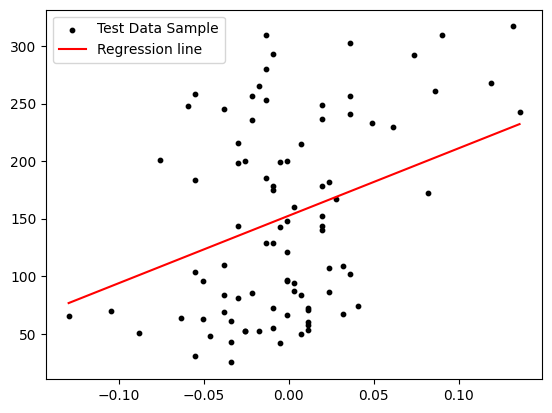

In [ ]:
# linear line의 생성
line_x = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']), 10) # x는 테스트 값
line_y = sim_lr.predict(line_x.reshape((-1,1))) # y는 예측한 값

print(line_x)
print(line_y)


# test data
plt.scatter(X_test['s6'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test Data Sample','Regression line'])

# 결과는 정확도가 상당히 떨어진다. data의 오차가 높음

In [ ]:
# Multiple Linear Regression
# 학습
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)
y_pred = mul_lr.predict(X_test) # 여러개 사용할 때는 X_test만 입력

In [ ]:
# 하나의 feature를 이용할 때보다 여러 feature를 사용할 때 정확도가 올라가는 것을 알 수 있음
# 서로 간의 feature가 연관성이 있을 정도로 영향력이 있음
# 편향적으로 군집되어 있는 data에 따라 리니어 리그레션은 비효과적 > Decision Tree Regression 사용
print('다중 선형 회귀, R2:{:.2f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀, R2:0.50


In [ ]:
# Decision Tree Regressor
# 'max_depth=5' 파라미터 지정해서 다시 보완, 정확도도 살짝 올라가고 그래프도 완만해짐
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)  

In [ ]:
# 학습
dt_regr.fit(X_train['s6'].values.reshape((-1,1)), y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# 예측
y_pred = dt_regr.predict(X_test['s6'].values.reshape((-1,1)))


In [ ]:
print('단순 결정 트리 회귀 R2: {:.2f}',format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2: {:.2f} 0.1381258997489918


[-0.12948301 -0.10002803 -0.07057305 -0.04111806 -0.01166308  0.0177919
  0.04724688  0.07670187  0.10615685  0.13561183]
[118.41176471 118.41176471 118.41176471 125.75       118.63636364
 150.42857143 197.57692308 202.66666667 202.66666667 263.        ]


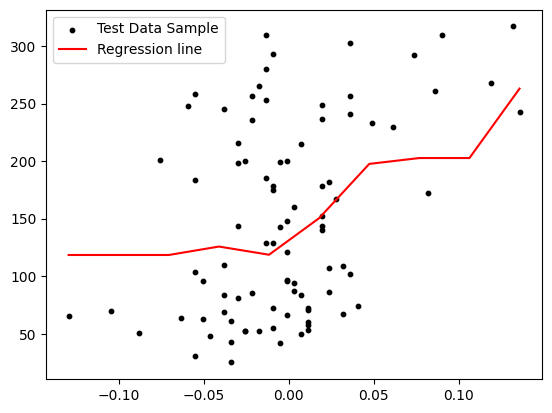

In [ ]:
# linear line의 생성
line_x = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']), 10) # x는 테스트 값
line_y = dt_regr.predict(line_x.reshape((-1,1))) # y는 예측한 값

print(line_x)
print(line_y)


# test data
plt.scatter(X_test['s6'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test Data Sample','Regression line'])

In [ ]:
########################################################################################

In [ ]:
# 다중 feature 사용
mt_regre = DecisionTreeRegressor(max_depth=3)
mt_regre.fit(X_train, y_train)
y_pred = mt_regre.predict(X_test)
print('다중 결정 트리 회귀, r2: {:.2f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리 회귀, r2: 0.35


In [ ]:
# Support Vector Machine Regressor

from sklearn.svm import SVR   # SVC, SVR 둘다 가능
svm_regre = SVR()
svm_regre.fit(X_train['s6'].values.reshape((-1,1)), y_train)
# 예측
y_pred = svm_regre.predict(X_test['s6'].values.reshape((-1,1)))
print('단순 서포트 벡터 머신 회귀, R2: {:.2f}'.format(r2_score(y_test, y_pred)))

# R2 : 0.06 값, 너무 낮다. 방안을 찾아야 된다.

단순 서포트 벡터 머신 회귀, R2: 0.06


In [ ]:
svm_regr = SVR(C=2)
svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)
print('다중 서포트 벡터 머신 회귀, R2: {:.2f}'.format(r2_score(y_test, y_pred)))


다중 서포트 벡터 머신 회귀, R2: 0.29


In [ ]:
# 새로운 데이터 유입을 생각하고 그래프가 어느정도 완만한게.. data를 노말하게 허용
# for문 적용하여 최적의 i값 조사
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  svm_regr = SVR(C=i)
  svm_regr.fit(X_train, y_train)
  y_pred = svm_regr.predict(X_test)
  print('다중 서포트 벡터 머신 회귀, i={} R2: {:.2f}'.format(i,r2_score(y_test, y_pred)))


다중 서포트 벡터 머신 회귀, i=1 R2: 0.17
다중 서포트 벡터 머신 회귀, i=2 R2: 0.29
다중 서포트 벡터 머신 회귀, i=3 R2: 0.35
다중 서포트 벡터 머신 회귀, i=4 R2: 0.39
다중 서포트 벡터 머신 회귀, i=5 R2: 0.42
다중 서포트 벡터 머신 회귀, i=6 R2: 0.44
다중 서포트 벡터 머신 회귀, i=7 R2: 0.46
다중 서포트 벡터 머신 회귀, i=8 R2: 0.47
다중 서포트 벡터 머신 회귀, i=9 R2: 0.48
다중 서포트 벡터 머신 회귀, i=10 R2: 0.49
다중 서포트 벡터 머신 회귀, i=11 R2: 0.49
다중 서포트 벡터 머신 회귀, i=12 R2: 0.50
다중 서포트 벡터 머신 회귀, i=13 R2: 0.50
다중 서포트 벡터 머신 회귀, i=14 R2: 0.50
다중 서포트 벡터 머신 회귀, i=15 R2: 0.50
다중 서포트 벡터 머신 회귀, i=16 R2: 0.50
다중 서포트 벡터 머신 회귀, i=17 R2: 0.50
다중 서포트 벡터 머신 회귀, i=18 R2: 0.50
다중 서포트 벡터 머신 회귀, i=19 R2: 0.50
다중 서포트 벡터 머신 회귀, i=20 R2: 0.50


In [ ]:
# Multi Layer Perceptron Regressor
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(hidden_layer_sizes=200, max_iter=400) # Parameters 변경
mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)
print('다중 MLP 회귀 R2: {:.2f}'.format(r2_score(y_test, y_pred)))

다중 MLP 회귀 R2: 0.12


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
